In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from lcs import *
import networkx as nx
from scipy.stats import beta
import time

In [40]:
G = nx.karate_club_graph()
G = nx.fast_gnp_random_graph(50, 20.0 / 49)
G = nx.watts_strogatz_graph(50, 6, 0.03)

A = nx.adjacency_matrix(G, weight=None).todense()
n = A.shape[0]

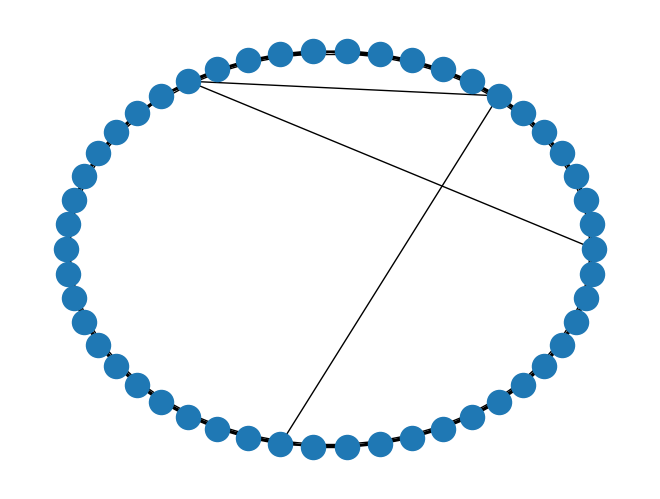

In [41]:
nx.draw(G, pos=nx.circular_layout(G))

In [67]:
rho0 = 1

x0 = np.zeros(n)
x0[list(random.sample(range(n), int(rho0 * n)))] = 1

gamma = 0.1
b = 0.14

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
contagion_function = lambda nu, b: b * (nu >= 2)
c = contagion_function(np.arange(n), b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=1000, random_seed=None)

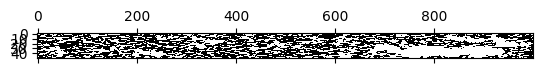

In [68]:
plt.spy(x.T)

In [69]:
p_c = np.ones((2, n))

p_rho = [1, 1]

rho0 = beta(p_rho[0], p_rho[1]).rvs()
print(rho0)

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))

samples, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=100, burn_in=100000, skip=1000, return_likelihood=True
)

0.6818287260080184
Acceptance ratio is 0.05350251256281407


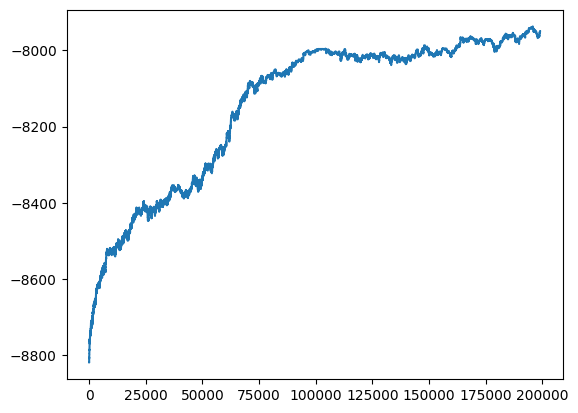

In [70]:
plt.plot(l)

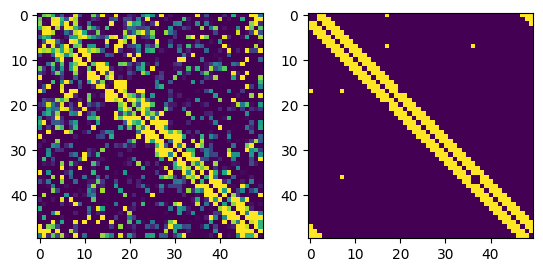

In [71]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p, cmap="viridis", vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(A, vmin=0, vmax=1)

In [72]:
posterior_similarity(A, samples)

0.5108756514622905

In [ ]:
samples = 1000

gamma = np.zeros(samples)
c_samples = np.zeros((samples, n))

p_rho = np.array([1, 1])
p_gamma = np.array([1, 1])
p_c = np.ones((2, n))

for i in range(1000):
    g, b = infer_dynamics(x, A, p_gamma, p_c)
    gamma[i] = g
    c_samples[i] = b

In [ ]:
plt.figure()
plt.subplot(211)
plt.title(r"$\gamma$")
plt.hist(gamma, bins=100)

plt.subplot(212)
plt.title(r"$\mathbf{c}$")
plt.plot(np.mean(c_samples, axis=0))
plt.xlabel(r"$\nu$")
plt.plot(c)

plt.tight_layout()
plt.show()